In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install shap
!pip install dtale

In [4]:
import pandas as pd
import numpy as np
#import dtale


df1 = pd.read_csv('/content/drive/MyDrive/HFT project1/lob_feature3.csv')
df2 = pd.read_csv('/content/drive/MyDrive/HFT project1/lob_feature2.csv')
df3 = pd.read_csv('/content/drive/MyDrive/HFT project1/lob_feature1.csv')
df4 = pd.read_csv('/content/drive/MyDrive/HFT project1/feature1 Volume.csv')
df5 = pd.read_csv('/content/drive/MyDrive/HFT project1/feature2 TA.csv')
df6 = pd.read_csv('/content/drive/MyDrive/HFT project1/feature2 TA2.csv')
df7 = pd.read_csv('/content/drive/MyDrive/HFT project1/feature3 MA.csv')

X = pd.concat([df1,df2,df3,df4,df5,df6,df7], axis=1)
X = X.drop(labels = range(0,200), axis=0)

Y = pd.read_csv('/content/drive/MyDrive/HFT project1/label.csv')
Y = Y.drop(labels = range(0,200), axis=0)


#dtale.show(X)
#dtale.show(Y)


In [5]:
from sklearn.model_selection import TimeSeriesSplit, train_test_split

X = np.array(X)
X = X.astype(np.float64)
Y = np.array(Y)

#trainX, testX, trainY, testY = train_test_split(X, Y, test_size= 0.3, shuffle = False)

tss = TimeSeriesSplit(n_splits=3)

for train_index, test_index in tss.split(X):
  trainX, testX = X[train_index], X[test_index]
  trainY, testY = Y[train_index], Y[test_index]

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))


trainX = np.nan_to_num(trainX)
testX = np.nan_to_num(testX)

trainX = scaler.fit_transform(trainX)
testX = scaler.transform(testX)

print(trainX)
print(testX)

[[ 0.87973087 -0.99421129  0.87978142 ...  0.88144703  0.88098371
   0.88156541]
 [ 0.87973087 -0.9869754   0.87894073 ...  0.88111004  0.88098371
   0.88153169]
 [ 0.87888982 -0.98552822  0.87894073 ...  0.88090785  0.88094997
   0.88149797]
 ...
 [-0.52817494 -0.98408104 -0.52753258 ... -0.53077558 -0.53061431
  -0.52973511]
 [-0.52565181 -0.99855282 -0.52501051 ... -0.52986571 -0.53037817
  -0.52966766]
 [-0.52481077 -0.99710564 -0.52416982 ... -0.52895584 -0.52980468
  -0.52946532]]
[[-0.52396972 -0.98118669 -0.52332913 ... -0.52828186 -0.52933239
  -0.52929671]
 [-0.52396972 -0.98118669 -0.52332913 ... -0.52781007 -0.52896131
  -0.52919554]
 [-0.52481077 -0.9869754  -0.52416982 ... -0.52764158 -0.52879263
  -0.52906065]
 ...
 [-0.26745164 -0.98408104 -0.26691887 ... -0.26849652 -0.26893364
  -0.26787732]
 [-0.26745164 -0.99565847 -0.26691887 ... -0.26846282 -0.26896738
  -0.26804593]
 [-0.2666106  -0.98986975 -0.26607818 ... -0.26829433 -0.26886617
  -0.26794476]]


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
    
train_X =  pca.fit_transform(trainX)
test_X = pca.transform(testX)

#from sklearn.manifold import TSNE

#tsne = TSNE(n_components=100, perplexity=50, learning_rate='auto', method='exact')

#train_X = tsne.fit_transform(trainX)
#test_X =tsne.fit_transform(testX)


print(train_X)
print(test_X)


[[-4.25481621e+00  1.83369995e+00 -1.28739286e+00 ...  8.36664050e-02
  -1.25824791e-02  6.46044075e-02]
 [-4.21988753e+00  2.65069926e-01  2.23541136e+00 ...  9.22779545e-03
  -3.59014952e-03 -2.36592696e-02]
 [-4.18120117e+00 -5.89775855e-01  2.10581992e+00 ...  4.21216352e-02
   5.44543608e-02  9.26123707e-02]
 ...
 [ 7.05492154e+00 -4.78475619e-01  1.39670933e+00 ...  4.36829135e-02
  -9.30191489e-02 -9.96780429e-02]
 [ 6.98347035e+00  2.49748441e+00 -1.76763029e+00 ... -1.27256331e-01
  -1.44267345e-01 -2.00095664e-01]
 [ 6.94878022e+00  3.38320512e+00 -1.32192532e+00 ...  7.97071064e-02
   2.26882695e-02 -6.88484121e-02]]
[[ 6.95763349  2.9462146   2.15540718 ...  0.18807497 -0.0520649
  -0.07465309]
 [ 6.95526342  3.05261569  2.13743176 ...  0.32428525  0.11310412
  -0.03312305]
 [ 6.96199992  2.79958416  2.41608423 ...  0.05987422 -0.0556802
   0.08241217]
 ...
 [ 5.1984211  -3.64858928  1.09240818 ... -0.14147132  0.11804145
  -0.07126859]
 [ 5.18444251 -2.89680914 -2.13367418

In [8]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

clf = lgb.LGBMClassifier()

clf.fit(train_X, trainY.ravel())

test = clf.predict(test_X)
print(accuracy_score(testY, test))


0.678305029130881


In [9]:
test2 = clf.predict(train_X)
print(accuracy_score(trainY, test2))

0.6458268153156247


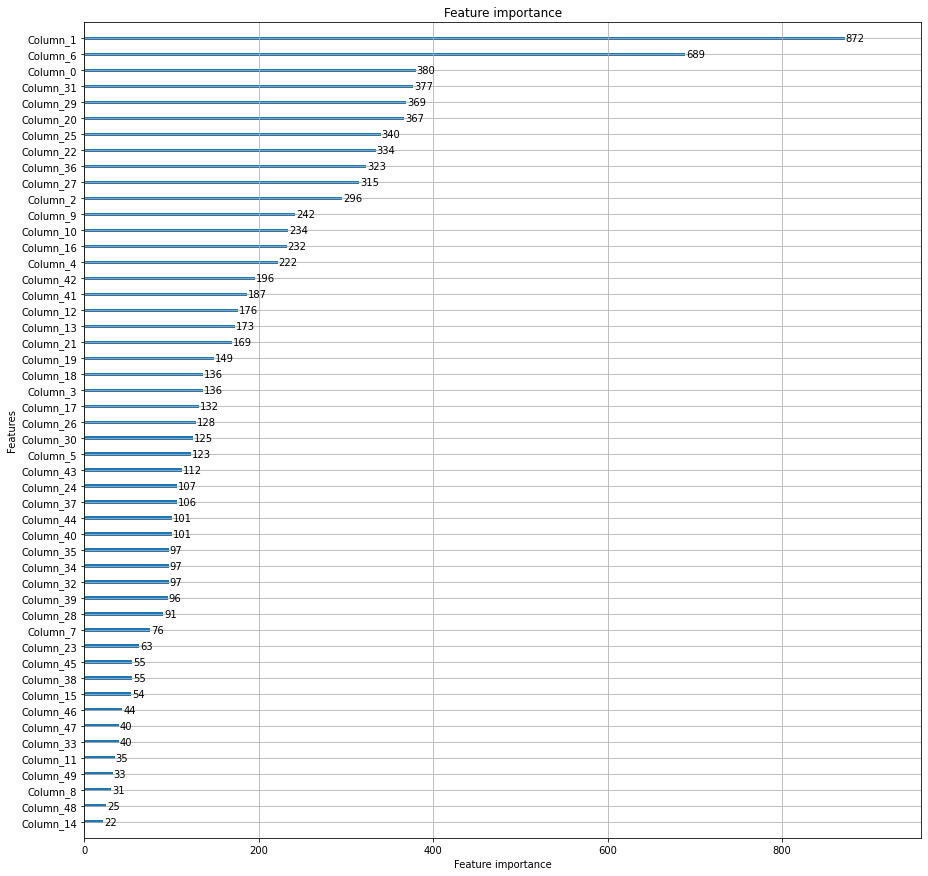

In [30]:
lgb.plot_importance(clf, max_num_features=50, figsize=(15,15))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


RF = RandomForestClassifier(n_estimators=5000, max_leaf_nodes=100, n_jobs=-1)

RF.fit(train_X, trainY.ravel())

test = RF.predict(test_X)
print(accuracy_score(testY, test))

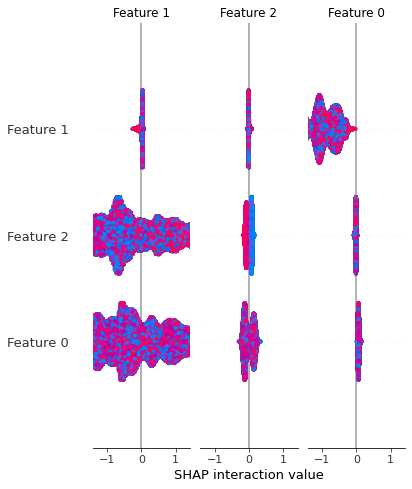

In [31]:
import shap

explainer = shap.Explainer(clf)

shap_values = explainer(test_X)
shap.summary_plot(shap_values, test_X)

In [11]:
backtestX = np.vstack((train_X, test_X))

signal=  clf.predict(backtestX)
signal = pd.DataFrame(signal)
print(accuracy_score(Y, signal))


0.6539463455347562


In [ ]:
import dtale

dtale.app.USE_COLAB = True
dtale.show(signal)

In [18]:
#signal.to_csv('/content/drive/MyDrive/signal1.csv')

In [24]:
print(signal)

         0
0       -1
1       -1
2       -1
3       -1
4       -1
...     ..
1048370 -1
1048371 -1
1048372 -1
1048373 -1
1048374  1

[1048375 rows x 1 columns]


In [35]:
bid_price = pd.DataFrame(X).iloc[:, 2]
bid_price = pd.DataFrame(bid_price)

print(bid_price)

               2
0        4772.25
1        4772.00
2        4772.00
3        4771.75
4        4771.75
...          ...
1048370  4431.50
1048371  4431.00
1048372  4431.25
1048373  4431.25
1048374  4431.50

[1048375 rows x 1 columns]


In [54]:
prices = pd.concat([bid_price, bid_price, bid_price, bid_price, signal, signal], axis=1)
prices.columns=['open','high','low','close','volume','predicted']
prices['volume'] = 0
print(prices)

            open     high      low    close  volume  predicted
0        4772.25  4772.25  4772.25  4772.25       0         -1
1        4772.00  4772.00  4772.00  4772.00       0         -1
2        4772.00  4772.00  4772.00  4772.00       0         -1
3        4771.75  4771.75  4771.75  4771.75       0         -1
4        4771.75  4771.75  4771.75  4771.75       0         -1
...          ...      ...      ...      ...     ...        ...
1048370  4431.50  4431.50  4431.50  4431.50       0         -1
1048371  4431.00  4431.00  4431.00  4431.00       0         -1
1048372  4431.25  4431.25  4431.25  4431.25       0         -1
1048373  4431.25  4431.25  4431.25  4431.25       0         -1
1048374  4431.50  4431.50  4431.50  4431.50       0          1

[1048375 rows x 6 columns]


In [55]:
prices.to_csv('/content/drive/MyDrive/prices')